In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import Rbf, griddata

data_file = "../../../data/one_day_data/2020/04/2020-04-18"
df = pd.read_csv(data_file + '/8-50.csv', index_col=0)
df['hour-rain'] = np.where(df['hour-rain'] > 0, df['hour-rain'], 0.1)
df.head()

,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1
Vlz-Bagbaguin_00174731,121.0009,14.7134,17.5,26.2,70.2,75.0,0.0,0.0
NagNayon_00181273,121.0285,14.7192,20.5,26.2,89.4,99.0,227.0,0.1
Sinegue_00181300,120.9319,14.4599,0.1,34.1,46.2,224.0,161.0,0.9
DLSAU_00174722,120.9974,14.6705,28.0,26.0,78.7,94.0,289.0,0.2
ASTI_00173457,121.0721,14.6471,0.5,25.8,75.1,41.0,66.0,0.9


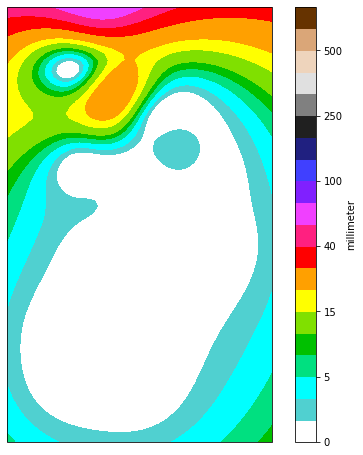

In [2]:
rbfi = Rbf(df['LON'], df['LAT'], df['hour-rain'])

grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
xi, yi = np.meshgrid(grid_lon, grid_lat)

z1 = rbfi(xi, yi)
rain_data = np.where(z1 > 0, z1, 0)
fig = plt.figure(figsize=(8, 8))
proj = ccrs.Stereographic(central_latitude=14.555, central_longitude=121.025)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines()

clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label('millimeter')
plt.show()
plt.close()

---------------------------------------- multiquadric ----------------------------------------


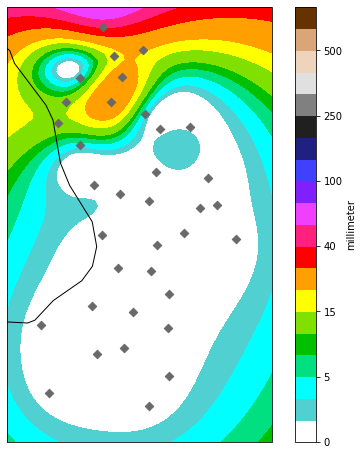

---------------------------------------- inverse ----------------------------------------


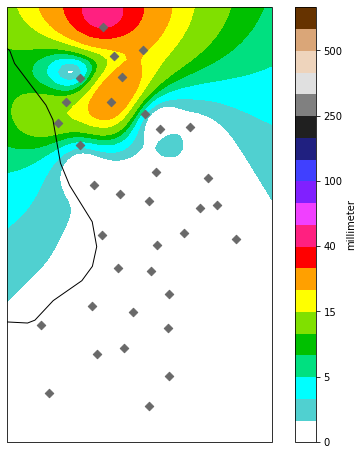

---------------------------------------- gaussian ----------------------------------------


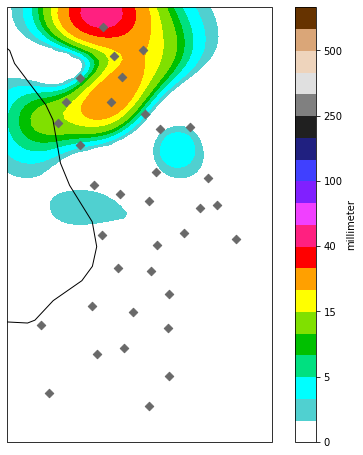

---------------------------------------- linear ----------------------------------------


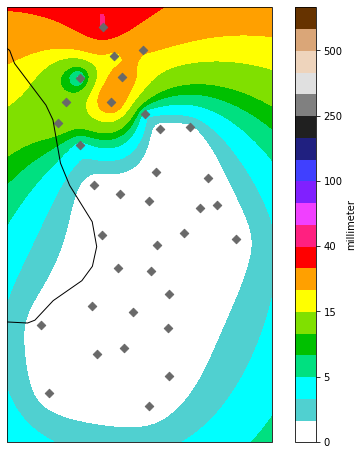

---------------------------------------- cubic ----------------------------------------


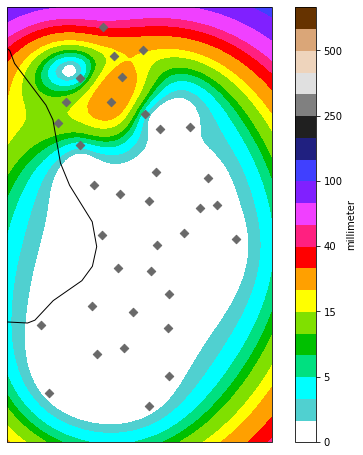

---------------------------------------- quintic ----------------------------------------


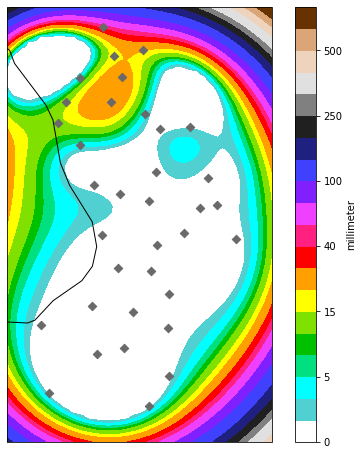

---------------------------------------- thin_plate ----------------------------------------


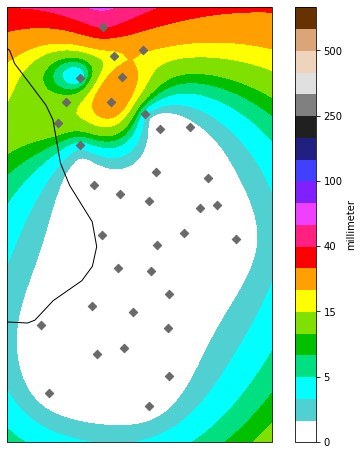

In [4]:
def func_rbf(func):
    rbfi = Rbf(df['LON'], df['LAT'], df['hour-rain'], function=func)

    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)

    z1 = rbfi(xi, yi)
    rain_data = np.where(z1 > 0, z1, 0)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)


    clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
    cmap_data = [(1.0, 1.0, 1.0),
                 (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                 (0.0, 1.0, 1.0),
                 (0.0, 0.8784313797950745, 0.501960813999176),
                 (0.0, 0.7529411911964417, 0.0),
                 (0.501960813999176, 0.8784313797950745, 0.0),
                 (1.0, 1.0, 0.0),
                 (1.0, 0.6274510025978088, 0.0),
                 (1.0, 0.0, 0.0),
                 (1.0, 0.125490203499794, 0.501960813999176),
                 (0.9411764740943909, 0.250980406999588, 1.0),
                 (0.501960813999176, 0.125490203499794, 1.0),
                 (0.250980406999588, 0.250980406999588, 1.0),
                 (0.125490203499794, 0.125490203499794, 0.501960813999176),
                 (0.125490203499794, 0.125490203499794, 0.125490203499794),
                 (0.501960813999176, 0.501960813999176, 0.501960813999176),
                 (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                 (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                 (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                 (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                 (0.4000000059604645, 0.20000000298023224, 0.0)]
    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    
    plt.show()
    plt.close()
    
func_names = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']
for func in func_names:
    print('-'*40, func, '-'*40)
    func_rbf(func)

---------------------------------------- multiquadric ----------------------------------------


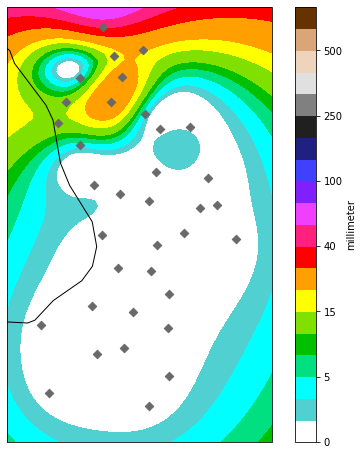

---------------------------------------- inverse ----------------------------------------


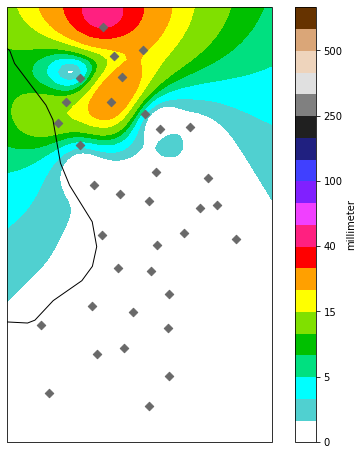

---------------------------------------- gaussian ----------------------------------------


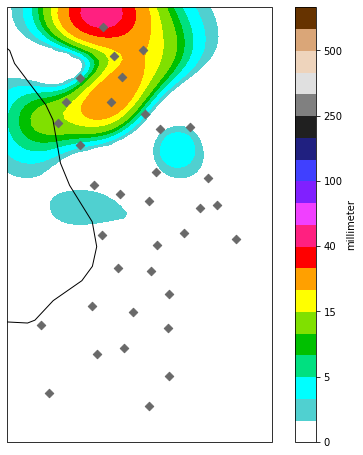

---------------------------------------- linear ----------------------------------------


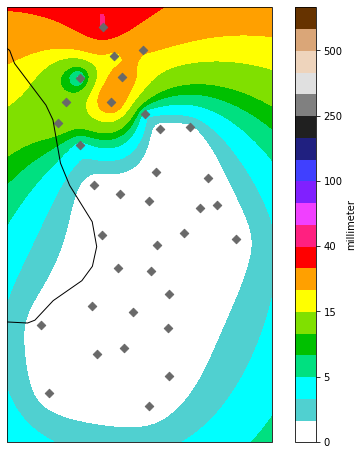

---------------------------------------- cubic ----------------------------------------


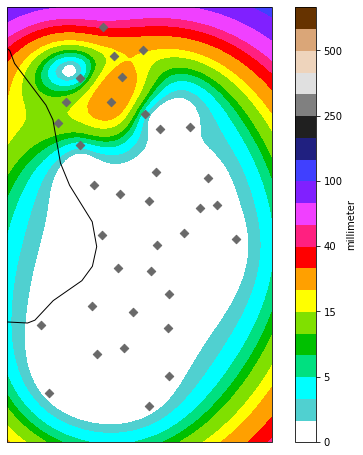

---------------------------------------- quintic ----------------------------------------


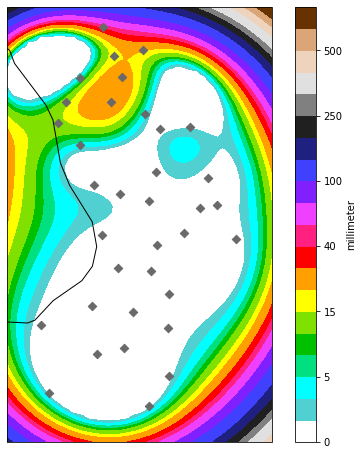

---------------------------------------- thin_plate ----------------------------------------


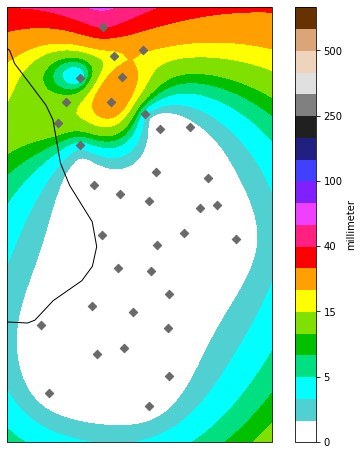

In [6]:
def func_rbf(func):
    rbfi = Rbf(df['LON'], df['LAT'], df['hour-rain'], function=func)

    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)

    z1 = rbfi(xi, yi)
    rain_data = np.where(z1 > 0, z1, 0)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)


    clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
    cmap_data = [(1.0, 1.0, 1.0),
                 (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                 (0.0, 1.0, 1.0),
                 (0.0, 0.8784313797950745, 0.501960813999176),
                 (0.0, 0.7529411911964417, 0.0),
                 (0.501960813999176, 0.8784313797950745, 0.0),
                 (1.0, 1.0, 0.0),
                 (1.0, 0.6274510025978088, 0.0),
                 (1.0, 0.0, 0.0),
                 (1.0, 0.125490203499794, 0.501960813999176),
                 (0.9411764740943909, 0.250980406999588, 1.0),
                 (0.501960813999176, 0.125490203499794, 1.0),
                 (0.250980406999588, 0.250980406999588, 1.0),
                 (0.125490203499794, 0.125490203499794, 0.501960813999176),
                 (0.125490203499794, 0.125490203499794, 0.125490203499794),
                 (0.501960813999176, 0.501960813999176, 0.501960813999176),
                 (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                 (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                 (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                 (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                 (0.4000000059604645, 0.20000000298023224, 0.0)]
    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    
    plt.show()
    plt.close()
    
func_names = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']
for func in func_names:
    print('-'*40, func, '-'*40)
    func_rbf(func)

---------------------------------------- nearest ----------------------------------------
[[ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 ...
 [ 3.   3.   3.  ... 20.5 20.5 20.5]
 [40.5 40.5 40.5 ... 20.5 20.5 20.5]
 [40.5 40.5 40.5 ... 20.5 20.5 20.5]]


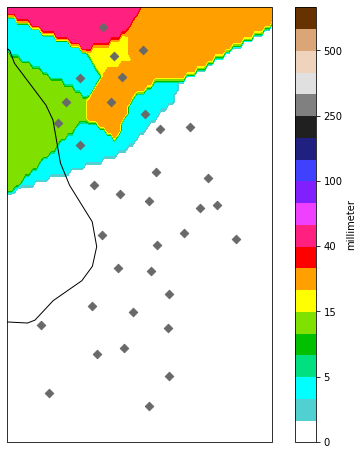

---------------------------------------- linear ----------------------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


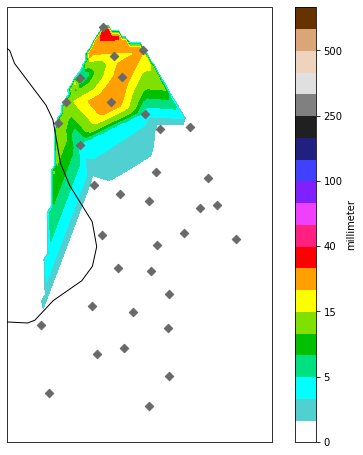

---------------------------------------- cubic ----------------------------------------
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


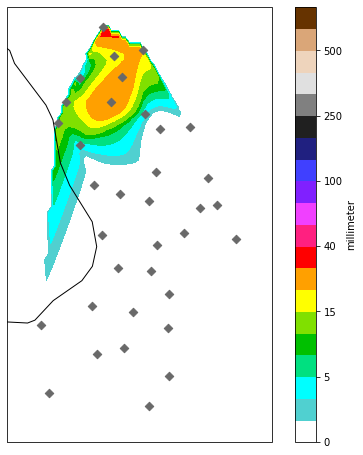

In [8]:
from scipy.interpolate import griddata as Grid
def func_rbf(func):
    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)
    z1 = Grid((df['LON'], df['LAT']), df['hour-rain'], (xi, yi), method=func)
    print(z1)

    rain_data = np.where(z1 > 0, z1, 0)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)


    clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
    cmap_data = [(1.0, 1.0, 1.0),
                 (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                 (0.0, 1.0, 1.0),
                 (0.0, 0.8784313797950745, 0.501960813999176),
                 (0.0, 0.7529411911964417, 0.0),
                 (0.501960813999176, 0.8784313797950745, 0.0),
                 (1.0, 1.0, 0.0),
                 (1.0, 0.6274510025978088, 0.0),
                 (1.0, 0.0, 0.0),
                 (1.0, 0.125490203499794, 0.501960813999176),
                 (0.9411764740943909, 0.250980406999588, 1.0),
                 (0.501960813999176, 0.125490203499794, 1.0),
                 (0.250980406999588, 0.250980406999588, 1.0),
                 (0.125490203499794, 0.125490203499794, 0.501960813999176),
                 (0.125490203499794, 0.125490203499794, 0.125490203499794),
                 (0.501960813999176, 0.501960813999176, 0.501960813999176),
                 (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                 (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                 (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                 (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                 (0.4000000059604645, 0.20000000298023224, 0.0)]
    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    
    plt.show()
    plt.close()
    
func_names = ['nearest', 'linear', 'cubic']
for func in func_names:
    print('-'*40, func, '-'*40)
    func_rbf(func)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


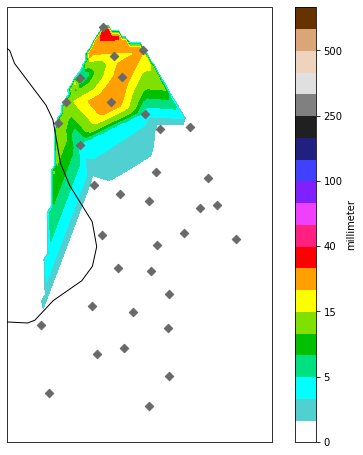

In [11]:
from scipy.interpolate import LinearNDInterpolator as Linear

grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
xi, yi = np.meshgrid(grid_lon, grid_lat)
interp = Linear((df['LON'], df['LAT']), df['hour-rain'])
z1 = interp(xi, yi)
print(z1)

rain_data = np.where(z1 > 0, z1, 0)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([120.90, 121.150, 14.350, 14.760])
ax.add_feature(cfeature.COASTLINE)


clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label('millimeter')

ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')

plt.show()
plt.close()

---------------------------------------- linear ----------------------------------------
[[ 0.1         0.1         0.1        ... -0.00863644 -0.00863644
  -0.00863644]
 [ 0.1         0.1         0.1        ... -0.00863644 -0.00863644
  -0.00863644]
 [ 0.1         0.1         0.1        ... -0.00863644 -0.00863644
  -0.00863644]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


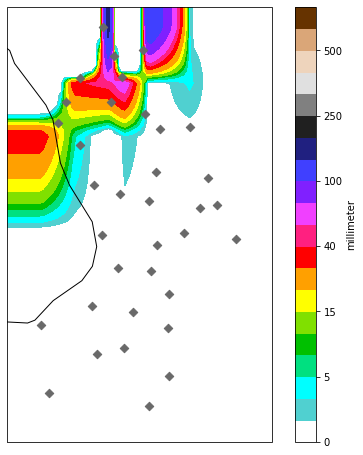

---------------------------------------- cubic ----------------------------------------
[[ 1.60581044e+02  1.60581044e+02  1.60581044e+02 ... -2.67351637e+01
  -2.67351637e+01 -2.67351637e+01]
 [ 1.60581044e+02  1.60581044e+02  1.60581044e+02 ... -2.67351637e+01
  -2.67351637e+01 -2.67351637e+01]
 [ 1.60581044e+02  1.60581044e+02  1.60581044e+02 ... -2.67351637e+01
  -2.67351637e+01 -2.67351637e+01]
 ...
 [-5.35003856e+05 -5.35003856e+05 -5.35003856e+05 ...  1.29662066e+05
   1.29662066e+05  1.29662066e+05]
 [-5.35003856e+05 -5.35003856e+05 -5.35003856e+05 ...  1.29662066e+05
   1.29662066e+05  1.29662066e+05]
 [-5.35003856e+05 -5.35003856e+05 -5.35003856e+05 ...  1.29662066e+05
   1.29662066e+05  1.29662066e+05]]


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=9,11 m=35 fp=0.000039 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


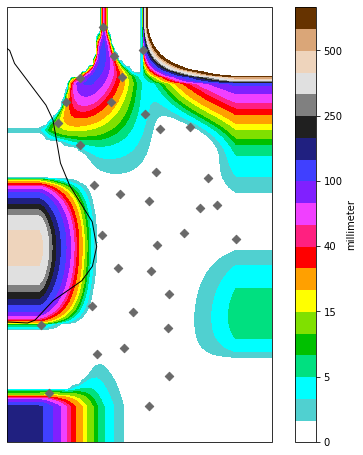

---------------------------------------- quintic ----------------------------------------


TypeError: m >= (kx+1)(ky+1) must hold

In [24]:
from scipy.interpolate import interp2d

def func_rbf(func):
    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)
    f = interp2d(x=df['LON'], y=df['LAT'].values, z=df['hour-rain'], kind=func)
    z1 = f(grid_lon, grid_lat)
    print(z1)

    rain_data = np.where(z1 > 0, z1, 0)
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)


    clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
    cmap_data = [(1.0, 1.0, 1.0),
                 (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                 (0.0, 1.0, 1.0),
                 (0.0, 0.8784313797950745, 0.501960813999176),
                 (0.0, 0.7529411911964417, 0.0),
                 (0.501960813999176, 0.8784313797950745, 0.0),
                 (1.0, 1.0, 0.0),
                 (1.0, 0.6274510025978088, 0.0),
                 (1.0, 0.0, 0.0),
                 (1.0, 0.125490203499794, 0.501960813999176),
                 (0.9411764740943909, 0.250980406999588, 1.0),
                 (0.501960813999176, 0.125490203499794, 1.0),
                 (0.250980406999588, 0.250980406999588, 1.0),
                 (0.125490203499794, 0.125490203499794, 0.501960813999176),
                 (0.125490203499794, 0.125490203499794, 0.125490203499794),
                 (0.501960813999176, 0.501960813999176, 0.501960813999176),
                 (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                 (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                 (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                 (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                 (0.4000000059604645, 0.20000000298023224, 0.0)]
    cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    
    plt.show()
    plt.close()
    
func_names = ['linear', 'cubic', 'quintic']
for func in func_names:
    print('-'*40, func, '-'*40)
    func_rbf(func)